## Explanation

**NONE OF THE CODE IS GRADED**

In [22]:
# pip install pip install -r requirements.txt 

# Step a: Importing Libraries

import pandas as pd              # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization

from sklearn.ensemble import RandomForestClassifier  # For feature importance analysis
from sklearn.model_selection import train_test_split # For splitting the dataset

import statsmodels.api as sm     # For logistic regression and statistical analysis


In [3]:
# assign the dataset to a variable !!! change the path to the location of the dataset on your machine!!!
data = pd.read_csv('/Users/bobi/Desktop/diabetes_ml_project/diabetes.csv')

# Preview the first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())

# Check the shape (rows, columns)
print("\nDataset shape (rows, columns):", data.shape)

# Check column names
print("\nColumn names:", data.columns.tolist())

# Check the data types of each column
print("\nData types:")
display(data.dtypes)

# Check for missing values
print("\nMissing values in each column:")
display(data.isnull().sum())

# Get basic descriptive statistics
print("\nDescriptive statistics:")
display(data.describe())


First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataset shape (rows, columns): (768, 9)

Column names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Data types:


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Missing values in each column:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Descriptive statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Check for missing values in each column
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**There are no missing values it seems like, making it easy**


**HANDLING OUTLIERS**
we chose to move the outliers to the bounds

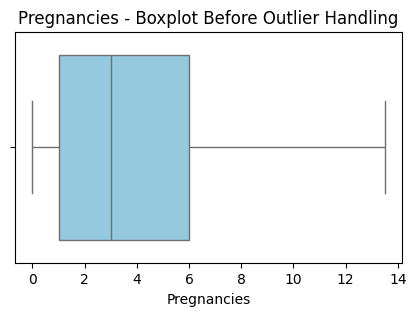

Pregnancies lower bound: -6.50, upper bound: 13.50


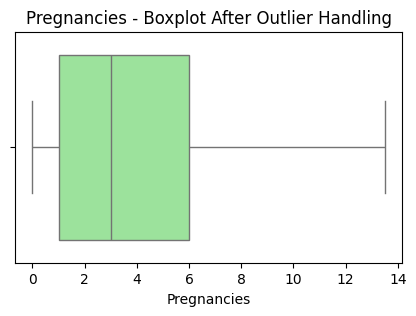

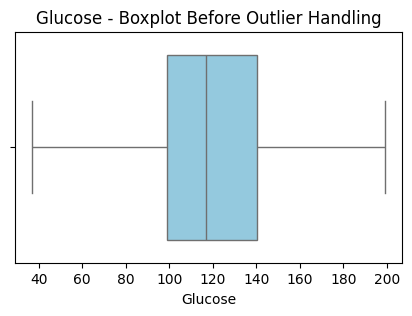

Glucose lower bound: 37.12, upper bound: 202.12


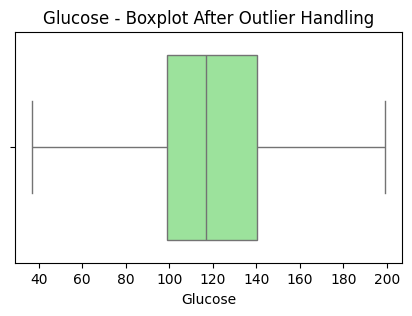

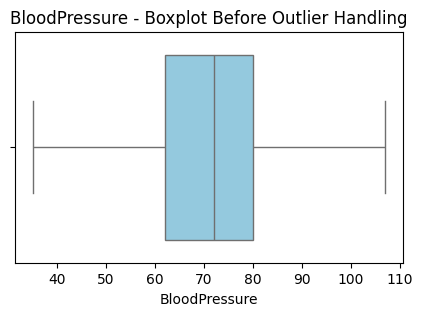

BloodPressure lower bound: 35.00, upper bound: 107.00


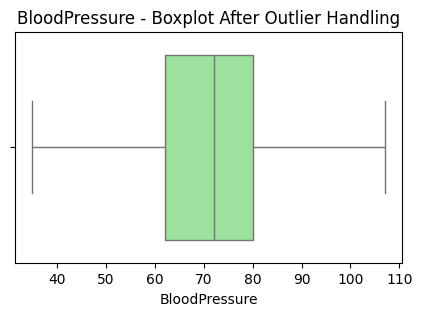

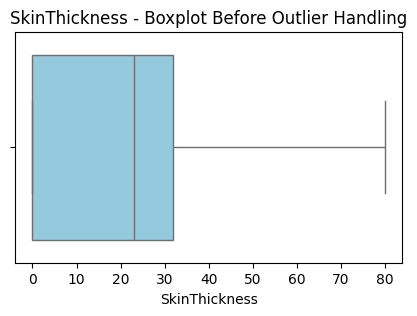

SkinThickness lower bound: -48.00, upper bound: 80.00


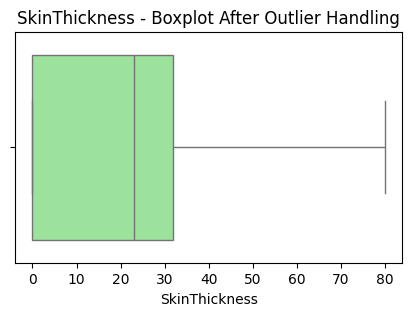

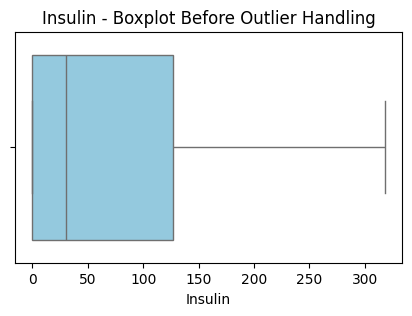

Insulin lower bound: -190.88, upper bound: 318.12


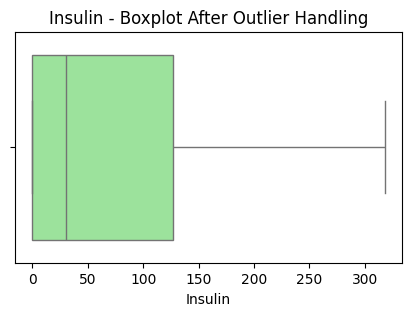

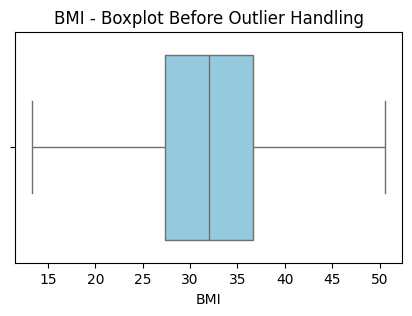

BMI lower bound: 13.35, upper bound: 50.55


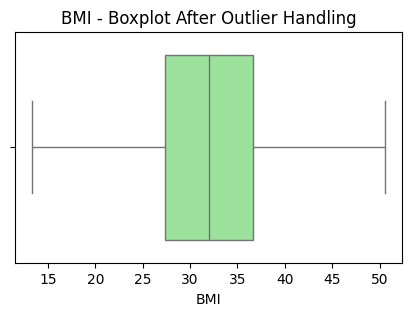

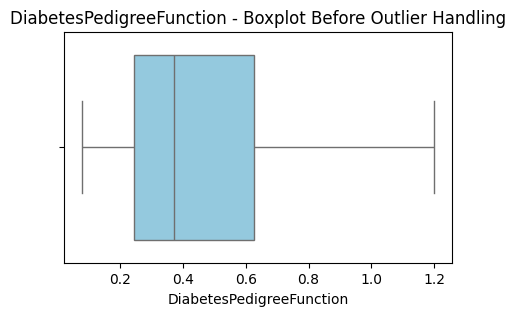

DiabetesPedigreeFunction lower bound: -0.33, upper bound: 1.20


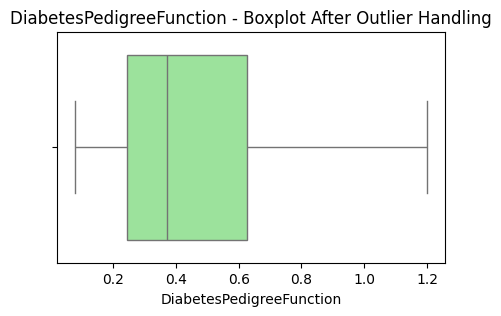

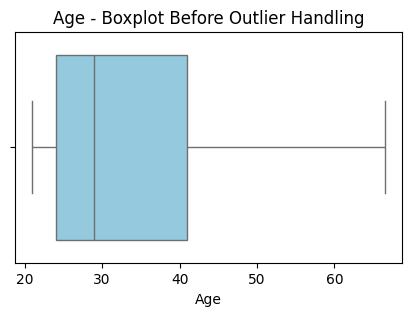

Age lower bound: -1.50, upper bound: 66.50


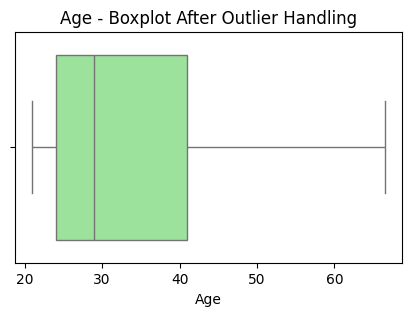

Outlier handling complete.


In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# List of numeric columns (excluding the target 'Outcome')
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in num_cols:
    # 1. Visualize current distribution with a boxplot
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f"{col} - Boxplot Before Outlier Handling")
    plt.show()
    
    # 2. Calculate IQR, lower, and upper bounds
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"{col} lower bound: {lower_bound:.2f}, upper bound: {upper_bound:.2f}")
    
    # 3. Cap (clip) the outliers
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    
    # 4. Check the distribution again after capping
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f"{col} - Boxplot After Outlier Handling")
    plt.show()

print("Outlier handling complete.")


# Is data balanced?

Class distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Class percentages:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


/var/folders/_c/y0spb0d965v9txb4rv1lhrhc0000gn/T/ipykernel_44679/3427185329.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette='pastel')


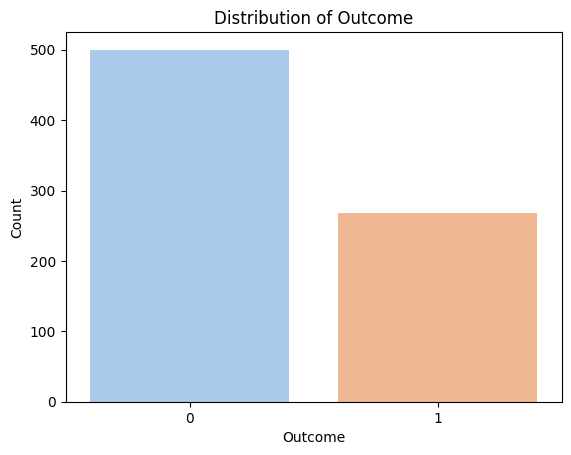

In [14]:
# Count the occurrences of each class in the target variable
class_counts = data['Outcome'].value_counts()
print("Class distribution:")
print(class_counts)

# Calculate the percentage of each class
class_percentages = data['Outcome'].value_counts(normalize=True) * 100
print("\nClass percentages:")
print(class_percentages)

# Visualize the distribution using a countplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Outcome', data=data, palette='pastel')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


## After handling outliers, the next step is to prepare your data for modeling

Separating Features and Target:
Extract the independent variables (features) and the dependent variable (target).  drop the target column (e.g., Outcome) from the features.

Splitting the Data:
Divide dataset into training and testing sets. This helps train your model on one portion of the data and evaluate its performance on unseen data.

**DATA PROCESSING & SPLITTING**

In [15]:
# 'Outcome' is the target variable and all other columns are features ALSO THE DEPENDENT VARIABLE
X = data.drop("Outcome", axis=1)  # Extracting features by dropping the target column
y = data["Outcome"]               # Extracting the target variable

# Print out the shapes of the resulting feature set and target
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

Features shape (X): (768, 8)
Target shape (y): (768,)


**SPLITTING DATA FOR TRAINING**

In [12]:
from sklearn.model_selection import train_test_split

# Split the data: 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Confirm the split by printing the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (537, 8)
Testing features shape: (231, 8)
Training target shape: (537,)
Testing target shape: (231,)


**check for 0 values**

In [18]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


In [19]:
#checks for 0 values in the dataset as they are missing values, except in outcome

print("Check how many other missing (zero) values\n")

print("total number of rows: {}".format(len(data)))
print("number of rows missing Glucose: {}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing Insulin: {}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {}".format(len(data.loc[data['Age'] == 0])))


Check how many other missing (zero) values

total number of rows: 768
number of rows missing Glucose: 0
number of rows missing BloodPressure: 0
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 0
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0


In [20]:
# Columns in which a zero value is considered invalid (missing)
columns_with_zero_missing = [
    'Glucose', 
    'BloodPressure', 
    'SkinThickness', 
    'Insulin', 
    'BMI'
]

for col in columns_with_zero_missing:
    # Calculate the mean of the column, excluding zeros
    mean_value = data[data[col] != 0][col].mean()
    
    # Replace zeros with the calculated mean
    data[col] = data[col].replace(0, mean_value)

# Quick check to confirm no zeros remain in these columns
for col in columns_with_zero_missing:
    zero_count = (data[col] == 0).sum()
    print(f"Number of zeros in {col} after replacement: {zero_count}")


Number of zeros in Glucose after replacement: 0
Number of zeros in BloodPressure after replacement: 0
Number of zeros in SkinThickness after replacement: 0
Number of zeros in Insulin after replacement: 0
Number of zeros in BMI after replacement: 0


## Step D: Feature Importance Analysis with Random Forest

Model Training:
A RandomForestClassifier is created and trained using X_train and y_train.

Extracting Importances:
The feature_importances_ attribute gives a score for each feature. These scores indicate how much each feature contributes to the model’s predictions.

Displaying the Results:
A DataFrame is created to neatly display and sort the features by importance.

Visualization:
A horizontal bar chart is generated to visualize the feature importances, making it easier to compare the contribution of each feature.

This step will help you understand which variables play the most significant roles in predicting diabetes. After this, you can move on to further analysis—like using logistic regression to statistically test the significance of specific features such as BMI.

Feature Importances:
                    Feature  Importance
1                   Glucose    0.280759
5                       BMI    0.162067
7                       Age    0.143907
6  DiabetesPedigreeFunction    0.109428
2             BloodPressure    0.085756
0               Pregnancies    0.081919
3             SkinThickness    0.069762
4                   Insulin    0.066402


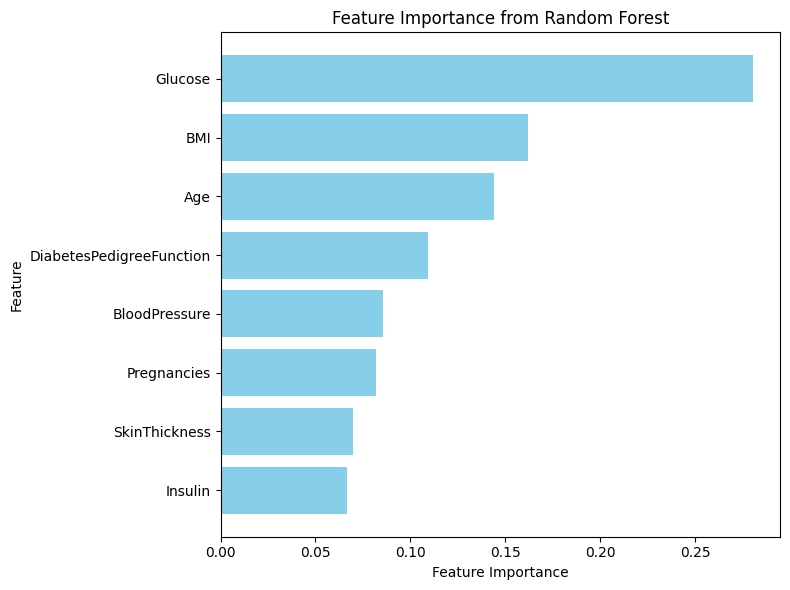

In [21]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create and train a Random Forest Classifier using the training set
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances from the trained model
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame to display and sort the feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Visualize the feature importances with a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.tight_layout()
plt.show()


**still have to do linear regression and EVALUATION**